In [62]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import os

# Rename all files

In [ ]:
src = ""


def rename_files(root, file, patient_id):
    if 'RTDOSE' in file:
        new_name = f"rtdose_{patient_id}.nrrd"
    elif 'GTV' in file:
        new_name = f"gtv_{patient_id}.nrrd"
    else :
        return
    old_file_path = os.path.join(root, file)
    new_file_path = os.path.join(root, new_name)
    os.rename(old_file_path, new_file_path)

def rename_mri_files(root, files, patient_id):
    mri_files = sorted([f for f in files if 'mr' in f.lower() and f.endswith('.nrrd')],
                       key=lambda x: x.split('_')[-1])
    
    if len(mri_files) == 2:
        pre_mri, post_mri = mri_files
        
        if "pre" in pre_mri or "post" in post_mri:
            return
        
        base_name_pre = "_".join(pre_mri.split('_')[:-1])
        base_name_post = "_".join(post_mri.split('_')[:-1])
        
        date_pre = pre_mri.split('_')[-1].split('.')[0]
        date_post = post_mri.split('_')[-1].split('.')[0]
        new_name_pre = f"{base_name_pre}_pre_{date_pre}.nrrd"
        new_name_post = f"{base_name_post}_post_{date_post}.nrrd"
        
        
        old_file_path_pre = os.path.join(root, pre_mri)
        new_file_path_pre = os.path.join(root, new_name_pre)
        os.rename(old_file_path_pre, new_file_path_pre)

        old_file_path_post = os.path.join(root, post_mri)
        new_file_path_post = os.path.join(root, new_name_post)
        os.rename(old_file_path_post, new_file_path_post)


for root, dirs, files in os.walk(src):
    patient_id = root.split(os.sep)[-1].split("_")[0].lower()
    rename_mri_files(root, files, patient_id)

    for file in files:
        if file.endswith(".nrrd"):
            rename_files(root, file, patient_id)



# Load data 

In [63]:
def load_data(folder):

    pre_treatment_mri = None
    post_treatment_mri = None
    rtdose = None
    gtv = None
    

    for file in os.listdir(folder):
        if file.endswith('.nii'):
            file_path = os.path.join(folder, file)
            data_nifti = nib.load(file_path)
            data = np.array(data_nifti.dataobj, dtype=np.float32)
            if 'pre' in file:
                pre_treatment_mri = data
            elif 'post' in file:
                post_treatment_mri = data
            elif 'RTDOSE' in file:
                rtdose = data
            elif 'GTV' in file:
                gtv = data
    
    return pre_treatment_mri, post_treatment_mri, rtdose, gtv

In [64]:
folder = "./data"
dataset = []

for root, dirs, files in os.walk(folder):
    for d in dirs:
        path = os.path.join(root, d)
        pre_treatment_mri, post_treatment_mri, rtdose, gtv= load_data(path)
        dataset.append((pre_treatment_mri, post_treatment_mri, rtdose, gtv))
        

In [65]:
def show_shapes(patient):
    print(f"Pre-treatment MRI shape: {patient[0].shape}")
    print(f"Post-treatment MRI shape: {patient[1].shape}")
    print(f"RTDOSE shape: {patient[2].shape}")
    print(f"GTV shape: {patient[3].shape}")

#show_shapes(dataset[0])
print(dataset[0])

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 9.,  5.,  3., ...,  0.,  0.,  0.],
        [10.,  7.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  2.,  1., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 6.,  1.,  7., ...,  0.,  0.,  0.],
        [ 6.,  2.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0

In [66]:
def show_slice(data, slice_idx):
    fig, axes = plt.subplots(2, 2)

    axes[0, 0].imshow(pre_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 0].set_title('Pre-treatment MRI')
    axes[0, 1].imshow(post_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 1].set_title('Post-treatment MRI')
    axes[1, 0].imshow(rtdose[:, :, 80], cmap='bone')
    axes[1, 0].set_title('RTDOSE')
    axes[1, 1].imshow(gtv[:, :, 80], cmap='bone')
    axes[1, 1].set_title('GTV')

    for ax in axes.flatten():
        ax.axis('off')
    
    plt.tight_layout()
    ax_slider = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')

    slider = Slider(ax_slider, 'Slice', 0, 9, valinit=0, valstep=1)

    def update(val):

        slice_idx = int(slider.val)
        axes[0, 0].imshow(pre_treatment_mri[:, :, slice_idx], cmap='bone')
        axes[0, 1].imshow(post_treatment_mri[:, :, slice_idx], cmap='bone')
        axes[1, 0].imshow(rtdose[:, :, slice_idx], cmap='bone')
        axes[1, 1].imshow(gtv[:, :, slice_idx], cmap='bone')
        fig.canvas.draw_idle()

    slider.on_changed(update)

    plt.show()


# Extract in pre/post mri only frames with GTV

In [67]:
def extract_frames_with_gtv(shape_data, pre, post, gtv, rtdose):
    pre_frames = []
    post_frames = []
    rtdose_frames = []
    
    if pre.shape !=  post.shape != gtv.shape != rtdose.shape:
        raise ValueError("Pre and post treatment MRI should have the same shape")
    
    
    for i in range(pre.shape[-1]):
        if np.any(gtv[:, :, i]):
            pre_data = pre[:, :, i][None, ...]
            post_data = post[:, :, i][None, ...]
            rtdose_data = rtdose[:, :, i][None, ...]
            
            if(pre_data.shape != shape_data.shape):

                
                data_add = np.zeros((1,63,512))
        
                pre_data = np.concatenate((data_add,pre_data,data_add), axis=1)
                post_data = np.concatenate((data_add,post_data,data_add), axis=1)
                rtdose_data = np.concatenate((data_add,rtdose_data,data_add), axis=1)
            
            
            
            pre_frames.append(pre_data)
            post_frames.append(post_data)
            rtdose_frames.append(rtdose_data)
    
    return pre_frames, post_frames, rtdose_frames


def global_extract(dataset):
    
    shape_data = np.zeros((1,512,512))
    print(shape_data.shape)
    
    pre_frames_glob = []
    post_frames_glob = []
    rtdose_frames_glob = []
    
    for patient in dataset:

        pre_treatment_mri, post_treatment_mri, rtdose, gtv = patient
        pre_frames, post_frames, rtdose_frames = extract_frames_with_gtv(shape_data, pre_treatment_mri, post_treatment_mri, gtv, rtdose)
        
        pre_frames_glob.extend(pre_frames)
        post_frames_glob.extend(post_frames)
        rtdose_frames_glob.extend(rtdose_frames)
    
    return pre_frames_glob, post_frames_glob, rtdose_frames_glob
    

#0660684358

In [68]:
pre_frames_glob, post_frames_glob, rtdose_frames_glob = global_extract(dataset)

(1, 512, 512)


In [69]:
print(len(pre_frames_glob))
print(len(post_frames_glob))
print(len(rtdose_frames_glob))

592
592
592


In [70]:
'''pre_frames_glob = pre_frames_glob[:-3]
post_frames_glob = post_frames_glob[:-3]
rtdose_frames_glob = rtdose_frames_glob[:-3]

print(len(rtdose_frames_glob))
print(len(post_frames_glob))
print(len(pre_frames_glob))'''

'pre_frames_glob = pre_frames_glob[:-3]\npost_frames_glob = post_frames_glob[:-3]\nrtdose_frames_glob = rtdose_frames_glob[:-3]\n\nprint(len(rtdose_frames_glob))\nprint(len(post_frames_glob))\nprint(len(pre_frames_glob))'

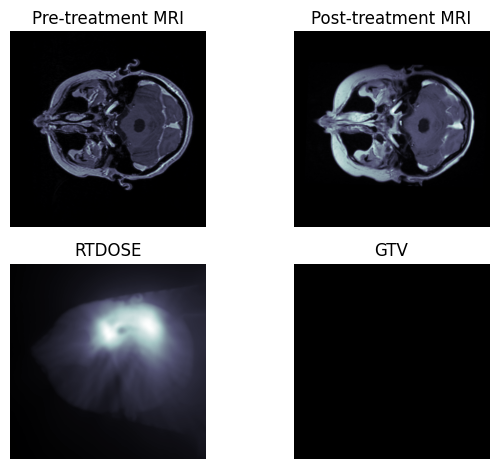

In [71]:
def imshow_patient(patient):
    pre_treatment_mri, post_treatment_mri, rtdose, gtv = patient
    
    fig, axes = plt.subplots(2, 2)
    
    axes[0, 0].imshow(pre_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 0].set_title('Pre-treatment MRI')
    
    axes[0, 1].imshow(post_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 1].set_title('Post-treatment MRI')
    
    axes[1, 0].imshow(rtdose[:, :, 80], cmap='bone')
    axes[1, 0].set_title('RTDOSE')
    
    axes[1, 1].imshow(gtv[:, :, 80], cmap='bone')
    axes[1, 1].set_title('GTV')
    
    for ax in axes.flatten():
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
imshow_patient(dataset[0])

# Normalization


In [72]:
'''pre = pre_frames_glob[0]
post = pre_frames_glob[1]

print(pre.shape)
print(post.shape)

pre_a = np.squeeze(pre)
post_a = np.squeeze(post)

print(pre_a.shape)
print(post_a.shape)

#plt.imshow(pre_a)
plt.imshow(post_a)
'''


'pre = pre_frames_glob[0]\npost = pre_frames_glob[1]\n\nprint(pre.shape)\nprint(post.shape)\n\npre_a = np.squeeze(pre)\npost_a = np.squeeze(post)\n\nprint(pre_a.shape)\nprint(post_a.shape)\n\n#plt.imshow(pre_a)\nplt.imshow(post_a)\n'

# Create torch dataset

In [73]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time

In [74]:
class MRIDataset(Dataset):
    def __init__(self, pre_frames, post_frames, rt_frames):
        self.pre_frames = pre_frames
        self.post_frames = post_frames
        self.rt_frames = rt_frames
        
    def __len__(self):
        return len(self.pre_frames)
    
    def __getitem__(self, idx):
        pre_frame = self.pre_frames[idx]
        post_frame = self.post_frames[idx]
        rt_frame = self.rt_frames[idx]
        
        pre_torch = torch.from_numpy(pre_frame).float()
        post_torch = torch.from_numpy(post_frame).float()
        rt_torch = torch.from_numpy(rt_frame).float()
        
        pre_frame = nn.functional.normalize(pre_torch)
        post_frame = nn.functional.normalize(post_torch)
        rt_frame = nn.functional.normalize(rt_torch)
    
        
        
        return pre_frame, post_frame, rt_frame

In [75]:
dataset = MRIDataset(pre_frames_glob, post_frames_glob, rtdose_frames_glob)

In [76]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = int(0.2 * train_size)
train_size = train_size - val_size

train_dataset, test_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=10, shuffle=True)


In [77]:
for pre, post, rtdose in train_dataloader:
    print(pre.shape)
    print(post.shape)
    print(rtdose.shape)
    break

torch.Size([10, 1, 512, 512])
torch.Size([10, 1, 512, 512])
torch.Size([10, 1, 512, 512])


# Create model

## UNet declaration

In [78]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # couche d'encodage
        self.enc_conv1 = self.double_conv(2, 64)
        self.enc_conv2 = self.double_conv(64, 128)
        self.enc_conv3 = self.double_conv(128, 256)
        self.enc_conv4 = self.double_conv(256, 512)
        self.enc_conv5 = self.double_conv(512, 1024)

        # couche decocage
        self.dec_conv4 = self.double_conv(1024 + 512, 512)
        self.dec_conv3 = self.double_conv(512 + 256, 256)
        self.dec_conv2 = self.double_conv(256 + 128, 128)
        self.dec_conv1 = self.double_conv(128 + 64, 64)

        # sortie
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)


        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):

        # chemin descendant
        x1 = self.enc_conv1(x)
        x2 = self.pool(x1)
        x2 = self.enc_conv2(x2)
        x3 = self.pool(x2)
        x3 = self.enc_conv3(x3)
        x4 = self.pool(x3)
        x4 = self.enc_conv4(x4)
        x5 = self.pool(x4)
        x5 = self.enc_conv5(x5)

        # chemin ascendant
        x = self.up(x5)
        x = torch.cat([x, x4], dim=1)
        x = self.dec_conv4(x)
        x = self.up(x)
        x = torch.cat([x, x3], dim=1)
        x = self.dec_conv3(x)
        x = self.up(x)
        x = torch.cat([x, x2], dim=1)
        x = self.dec_conv2(x)
        x = self.up(x)
        x = torch.cat([x, x1], dim=1)
        x = self.dec_conv1(x)

        # sortie
        x = self.final_conv(x)
        return x


In [79]:
class DiffusionModel(nn.Module):
    def __init__(self, unet_model, num_timesteps):
        super(DiffusionModel, self).__init__()
        self.unet_model = unet_model.to(device)
        self.num_timesteps = num_timesteps
        self.beta_schedule = torch.linspace(0.0001, 0.02, num_timesteps).to(device) 

    def forward(self, x):
        
        t = torch.randint(0, self.num_timesteps, (x.size(0),), device=x.device)
        
        beta_t = self.beta_schedule[t].unsqueeze(1).unsqueeze(2).unsqueeze(3)
        noise = torch.randn_like(x)
        noised_x = torch.sqrt(1 - beta_t) * x + torch.sqrt(beta_t) * noise

        # unet prediction du bruit
        predicted_noise = self.unet_model(noised_x)

        return predicted_noise


In [80]:
def train_diffusion_model(model, dataloader, optimizer, loss_function, num_epochs, beta_schedule, evalu, 
                          num_timesteps=None, writer=None):
    model.to(device)
    num_batches = len(dataloader)
    saved_predicted = None
    saved_real = None
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        epoch_loss = 0.0
        learn_loss = 0.0 
        start_time = time.time()
        for i, (pre_frame, post_frame, rt_frame) in enumerate(dataloader):
            print(f"Batch {i+1}/{len(dataloader)}", end='\r')
            pre_frame = pre_frame.to(device)
            post_frame = post_frame.to(device)
            rt_frame = rt_frame.to(device)
                    
            t = torch.randint(0, len(beta_schedule), (pre_frame.size(0),), device=pre_frame.device)

            # calcul du bruit
            beta_t = beta_schedule[t].unsqueeze(1).unsqueeze(2).unsqueeze(3)
            noise = torch.randn_like(pre_frame)
            noised_pre_frame = torch.sqrt(1 - beta_t) * pre_frame + torch.sqrt(beta_t) * noise
        

            # fusion de l'IRM prétraitement + la RTdose pour le passer dans le unet
            input_tensor = torch.cat([noised_pre_frame, rt_frame], dim=1)

            predicted_post_frame = model(input_tensor)

            # calcul de la loss
            loss = loss_function(predicted_post_frame, post_frame)
            epoch_loss += loss.item()
            
            learn = loss_function(pre_frame, post_frame)
            learn_loss += learn.item()
            
            if i == 0 and writer is not None:
                if not evalu :
                    saved_predicted = predicted_post_frame[i].detach().cpu()
                    saved_real = post_frame[i].detach().cpu()

            # mise a jour des poids
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        #epoch_loss /= num_batches   
        end_time = time.time()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, LearnLoss: {learn_loss:.4f}, Time: {end_time - start_time}s")
    
        if writer is not None:
            
            if not evalu :
                writer.add_scalars('Loss/train', {'predict':epoch_loss, 'learn':learn_loss}, epoch)
                writer.add_image('Image/Predicted Image', saved_predicted[0], epoch, dataformats='HW')
                writer.add_image('Image/Real Image', saved_real[0], epoch, dataformats='HW')
            
            else:
                writer.add_scalars(f'Eval/train{loss_function.__class__.__name__}_lr{lr}_timesteps{num_timesteps}', {'predict':epoch_loss, 'learn':learn_loss}, epoch)

            
            
        
        torch.save(model.state_dict(), 'checkpoint.pt')

In [81]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("le modèle tournera via votre GPU")
else:
    device = torch.device("cpu")
    print("le modèle tournera via votre CPU")
    

le modèle tournera via votre GPU


In [83]:
unet_model = UNet()
#unet_model = nn.DataParallel(unet_model)
#unet_model.to(device)


diffusion_model = DiffusionModel(unet_model, num_timesteps=1000)
#diffusion_model = nn.DataParallel(diffusion_model)
#diffusion_model.to(device)


optimizer = torch.optim.Adam(diffusion_model.parameters(), lr=0.001)
loss_function = nn.MSELoss()

beta_schedule = torch.linspace(0.001, 0.02, 1000).to(device)

writer = SummaryWriter()

train_diffusion_model(model=diffusion_model, dataloader=train_dataloader, optimizer=optimizer, 
                      loss_function=loss_function, num_epochs=20, beta_schedule=beta_schedule,
                      writer=writer, evalu=False)

writer.close()

Epoch 1/20
Epoch [1/20], Loss: 0.0276, LearnLoss: 0.0172, Time: 24.668763875961304s
Epoch 2/20
Epoch [2/20], Loss: 0.0149, LearnLoss: 0.0171, Time: 24.516576290130615s
Epoch 3/20
Epoch [3/20], Loss: 0.0133, LearnLoss: 0.0172, Time: 24.3849835395813s
Epoch 4/20
Epoch [4/20], Loss: 0.0128, LearnLoss: 0.0171, Time: 25.007229328155518s
Epoch 5/20
Epoch [5/20], Loss: 0.0136, LearnLoss: 0.0172, Time: 25.2194561958313s
Epoch 6/20
Epoch [6/20], Loss: 0.0123, LearnLoss: 0.0172, Time: 24.997518301010132s
Epoch 7/20
Epoch [7/20], Loss: 0.0125, LearnLoss: 0.0171, Time: 25.0054988861084s
Epoch 8/20
Epoch [8/20], Loss: 0.0116, LearnLoss: 0.0172, Time: 24.770282983779907s
Epoch 9/20
Epoch [9/20], Loss: 0.0111, LearnLoss: 0.0172, Time: 25.54224467277527s
Epoch 10/20
Epoch [10/20], Loss: 0.0108, LearnLoss: 0.0172, Time: 25.005157947540283s
Epoch 11/20
Epoch [11/20], Loss: 0.0105, LearnLoss: 0.0172, Time: 24.907763242721558s
Epoch 12/20
Epoch [12/20], Loss: 0.0103, LearnLoss: 0.0171, Time: 25.6307175159

In [ ]:
torch.save(diffusion_model.state_dict(), 'diffusion_model.pt')

## Optimisation des hyperparamètres

In [56]:
import itertools
import optuna

## Evaluation

In [84]:
def evaluate_model(model, dataloader, beta_schedule, loss_function , device):
    
    model.eval()
    total_loss = 0.0
    total_samples = 0
    
    
    with torch.no_grad():
        for i, (pre_frame, post_frame, rt_frame) in enumerate(dataloader):
            pre_frame = pre_frame.to(device)
            post_frame = post_frame.to(device)
            rt_frame = rt_frame.to(device)
                    
            t = torch.randint(0, len(beta_schedule), (pre_frame.size(0),), device=pre_frame.device)
            beta_t = beta_schedule[t].unsqueeze(1).unsqueeze(2).unsqueeze(3)
            noise = torch.randn_like(pre_frame)
            noised_pre_frame = torch.sqrt(1 - beta_t) * pre_frame + torch.sqrt(beta_t) * noise
        
            input_tensor = torch.cat([noised_pre_frame, rt_frame], dim=1)

            predicted_post_frame = model(input_tensor)

            loss = loss_function(predicted_post_frame, post_frame)
            total_loss += loss.item()
            total_samples += pre_frame.size(0)
            
    return total_loss / total_samples

In [87]:
def objective(trial):
    
    loss = trial.suggest_categorical('loss_function',["l1", "mse"])
    num_timesteps = trial.suggest_int('num_timesteps',10,3000)
    lr = trial.suggest_float('lr', 1e-5, 1e-3)
    batch_size = trial.suggest_int('batch_size',1,10)
    optimizer = trial.suggest_categorical("optimizer", ["Adam","SGD"])
    num_epochs = trial.suggest_int('num_epochs',10,100)
    
    print("------------------------------------------------------------------------------------------------")
    print(f'Testing with loss function: {loss}, num_timesteps: {num_timesteps}, lr: {lr}, batch_size: {batch_size}',
          f' optimizer: {optimizer}, num_epochs: {num_epochs}')
    
    
    dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    unet = UNet()
    unet.to(device)
    
    diffusion_model = DiffusionModel(unet, num_timesteps=num_timesteps)
    diffusion_model.to(device)
    
    beta_schedule = torch.linspace(0.001, 0.02, num_timesteps).to(device)
    
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(itertools.chain(diffusion_model.parameters()), lr=lr)
        
    elif optimizer == "SGD":
        optimizer = torch.optim.SGD(itertools.chain(diffusion_model.parameters()), lr=lr)
        
    
    if loss == "l1":
        loss_function = nn.L1Loss()
    
    
    elif loss == "mse":
        loss_function = nn.MSELoss()
        

    train_loss = train_diffusion_model(diffusion_model, dataloader_train, optimizer, loss_function, num_epochs, beta_schedule, writer=None, evalu=True)    
    
    average_loss = evaluate_model(model=diffusion_model, dataloader=dataloader_val, 
                                  beta_schedule=beta_schedule, loss_function=loss_function, device=device)
    
    print(average_loss)
    
    return average_loss


In [88]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)

print("------------------------------------ BEST PARAMS ---------------------------------------")
print(study.best_trial.params)

[I 2024-01-31 11:25:10,747] A new study created in memory with name: no-name-0227f3c5-544b-4824-bb54-34cd87018eb8


------------------------------------------------------------------------------------------------
Testing with loss function: l1, num_timesteps: 269, lr: 0.00046199828090553937, batch_size: 10  optimizer: SGD, num_epochs: 58
Epoch 1/58
Epoch [1/58], Loss: 1.8422, LearnLoss: 0.4392, Time: 24.47603487968445s
Epoch 2/58
Epoch [2/58], Loss: 1.3949, LearnLoss: 0.4394, Time: 24.842532873153687s
Epoch 3/58
Epoch [3/58], Loss: 1.2198, LearnLoss: 0.4393, Time: 23.904505252838135s
Epoch 4/58
Epoch [4/58], Loss: 1.1437, LearnLoss: 0.4393, Time: 24.43539571762085s
Epoch 5/58
Epoch [5/58], Loss: 1.1016, LearnLoss: 0.4392, Time: 24.427807331085205s
Epoch 6/58
Epoch [6/58], Loss: 1.0770, LearnLoss: 0.4392, Time: 25.202711582183838s
Epoch 7/58
Epoch [7/58], Loss: 1.0618, LearnLoss: 0.4393, Time: 24.611560583114624s
Epoch 8/58
Epoch [8/58], Loss: 1.0524, LearnLoss: 0.4392, Time: 24.85068440437317s
Epoch 9/58
Epoch [9/58], Loss: 1.0467, LearnLoss: 0.4392, Time: 24.586549282073975s
Epoch 10/58
Epoch [10/5

[I 2024-01-31 11:49:39,497] Trial 0 finished with value: 0.0028806923234716373 and parameters: {'loss_function': 'l1', 'num_timesteps': 269, 'lr': 0.00046199828090553937, 'batch_size': 10, 'optimizer': 'SGD', 'num_epochs': 58}. Best is trial 0 with value: 0.0028806923234716373.


0.0028806923234716373
------------------------------------------------------------------------------------------------
Testing with loss function: l1, num_timesteps: 2052, lr: 7.325413017311876e-05, batch_size: 6  optimizer: Adam, num_epochs: 79
Epoch 1/79
Epoch [1/79], Loss: 3.0122, LearnLoss: 0.7403, Time: 23.493096351623535s
Epoch 2/79
Epoch [2/79], Loss: 1.1810, LearnLoss: 0.7397, Time: 22.32761526107788s
Epoch 3/79
Epoch [3/79], Loss: 0.9248, LearnLoss: 0.7365, Time: 22.994236707687378s
Epoch 4/79
Epoch [4/79], Loss: 0.7804, LearnLoss: 0.7402, Time: 23.475372552871704s
Epoch 5/79
Epoch [5/79], Loss: 0.7239, LearnLoss: 0.7395, Time: 22.284661293029785s
Epoch 6/79
Epoch [6/79], Loss: 0.7012, LearnLoss: 0.7418, Time: 22.324723482131958s
Epoch 7/79
Epoch [7/79], Loss: 0.6894, LearnLoss: 0.7367, Time: 22.88190746307373s
Epoch 8/79
Epoch [8/79], Loss: 0.6785, LearnLoss: 0.7368, Time: 22.81002712249756s
Epoch 9/79
Epoch [9/79], Loss: 0.6716, LearnLoss: 0.7383, Time: 22.754499197006226s
E

[I 2024-01-31 12:19:41,137] Trial 1 finished with value: 0.0011229323312402406 and parameters: {'loss_function': 'l1', 'num_timesteps': 2052, 'lr': 7.325413017311876e-05, 'batch_size': 6, 'optimizer': 'Adam', 'num_epochs': 79}. Best is trial 1 with value: 0.0011229323312402406.


0.0011229323312402406
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 2830, lr: 0.0007699809655306477, batch_size: 9  optimizer: Adam, num_epochs: 51
Epoch 1/51
Epoch [1/51], Loss: 0.2782, LearnLoss: 0.0193, Time: 21.809701204299927s
Epoch 2/51
Epoch [2/51], Loss: 0.0344, LearnLoss: 0.0193, Time: 21.730748891830444s
Epoch 3/51
Epoch [3/51], Loss: 0.0221, LearnLoss: 0.0197, Time: 21.737031936645508s
Epoch 4/51
Epoch [4/51], Loss: 0.0169, LearnLoss: 0.0193, Time: 21.74635124206543s
Epoch 5/51
Epoch [5/51], Loss: 0.0157, LearnLoss: 0.0194, Time: 21.743512630462646s
Epoch 6/51
Epoch [6/51], Loss: 0.0141, LearnLoss: 0.0195, Time: 21.735725164413452s
Epoch 7/51
Epoch [7/51], Loss: 0.0135, LearnLoss: 0.0193, Time: 21.74449133872986s
Epoch 8/51
Epoch [8/51], Loss: 0.0136, LearnLoss: 0.0193, Time: 21.74736189842224s
Epoch 9/51
Epoch [9/51], Loss: 0.0132, LearnLoss: 0.0194, Time: 21.736931085586548s


[I 2024-01-31 12:38:20,325] Trial 2 finished with value: 2.3726034572625415e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 2830, 'lr': 0.0007699809655306477, 'batch_size': 9, 'optimizer': 'Adam', 'num_epochs': 51}. Best is trial 2 with value: 2.3726034572625415e-05.


2.3726034572625415e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 2323, lr: 0.0005843198546661147, batch_size: 5  optimizer: SGD, num_epochs: 31
Epoch 1/31
Epoch [1/31], Loss: 0.3770, LearnLoss: 0.0343, Time: 21.651230335235596s
Epoch 2/31
Epoch [2/31], Loss: 0.3133, LearnLoss: 0.0343, Time: 21.6483895778656s
Epoch 3/31
Epoch [3/31], Loss: 0.2631, LearnLoss: 0.0343, Time: 21.65317678451538s
Epoch 4/31
Epoch [4/31], Loss: 0.2237, LearnLoss: 0.0343, Time: 21.65502095222473s
Epoch 5/31
Epoch [5/31], Loss: 0.1928, LearnLoss: 0.0343, Time: 21.651992321014404s
Epoch 6/31
Epoch [6/31], Loss: 0.1684, LearnLoss: 0.0343, Time: 21.654075145721436s
Epoch 7/31
Epoch [7/31], Loss: 0.1493, LearnLoss: 0.0343, Time: 21.65276074409485s
Epoch 8/31
Epoch [8/31], Loss: 0.1344, LearnLoss: 0.0343, Time: 21.65616202354431s
Epoch 9/31
Epoch [9/31], Loss: 0.1225, LearnLoss: 0.0343, Time: 21.64873170852661s
Epoc

[I 2024-01-31 12:49:41,256] Trial 3 finished with value: 0.00021370275669354706 and parameters: {'loss_function': 'mse', 'num_timesteps': 2323, 'lr': 0.0005843198546661147, 'batch_size': 5, 'optimizer': 'SGD', 'num_epochs': 31}. Best is trial 2 with value: 2.3726034572625415e-05.


0.00021370275669354706
------------------------------------------------------------------------------------------------
Testing with loss function: l1, num_timesteps: 1233, lr: 0.0003360840253224032, batch_size: 1  optimizer: SGD, num_epochs: 44
Epoch 1/44
Epoch [1/44], Loss: 10.4810, LearnLoss: 4.3810, Time: 22.02365469932556s
Epoch 2/44
Epoch [2/44], Loss: 10.4212, LearnLoss: 4.3810, Time: 22.036677598953247s
Epoch 3/44
Epoch [3/44], Loss: 10.4121, LearnLoss: 4.3810, Time: 22.033976793289185s
Epoch 4/44
Epoch [4/44], Loss: 10.4084, LearnLoss: 4.3810, Time: 22.008830785751343s
Epoch 5/44
Epoch [5/44], Loss: 10.4053, LearnLoss: 4.3810, Time: 22.020602226257324s
Epoch 6/44
Epoch [6/44], Loss: 10.4016, LearnLoss: 4.3810, Time: 22.0330650806427s
Epoch 7/44
Epoch [7/44], Loss: 10.3989, LearnLoss: 4.3810, Time: 22.03603720664978s
Epoch 8/44
Epoch [8/44], Loss: 10.3959, LearnLoss: 4.3810, Time: 22.029176473617554s
Epoch 9/44
Epoch [9/44], Loss: 10.3929, LearnLoss: 4.3810, Time: 22.0342674255

[I 2024-01-31 13:05:58,427] Trial 4 finished with value: 0.027005023917460694 and parameters: {'loss_function': 'l1', 'num_timesteps': 1233, 'lr': 0.0003360840253224032, 'batch_size': 1, 'optimizer': 'SGD', 'num_epochs': 44}. Best is trial 2 with value: 2.3726034572625415e-05.


0.027005023917460694
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 2163, lr: 0.0007156465165320902, batch_size: 9  optimizer: Adam, num_epochs: 44
Epoch 1/44
Epoch [1/44], Loss: 0.3640, LearnLoss: 0.0193, Time: 21.722601652145386s
Epoch 2/44
Epoch [2/44], Loss: 0.0228, LearnLoss: 0.0194, Time: 21.675666570663452s
Epoch 3/44
Epoch [3/44], Loss: 0.0161, LearnLoss: 0.0195, Time: 21.67363405227661s
Epoch 4/44
Epoch [4/44], Loss: 0.0146, LearnLoss: 0.0193, Time: 21.674147605895996s
Epoch 5/44
Epoch [5/44], Loss: 0.0142, LearnLoss: 0.0194, Time: 21.66734004020691s
Epoch 6/44
Epoch [6/44], Loss: 0.0141, LearnLoss: 0.0193, Time: 21.668070793151855s
Epoch 7/44
Epoch [7/44], Loss: 0.0139, LearnLoss: 0.0193, Time: 21.669164419174194s
Epoch 8/44
Epoch [8/44], Loss: 0.0132, LearnLoss: 0.0193, Time: 21.680217266082764s
Epoch 9/44
Epoch [9/44], Loss: 0.0130, LearnLoss: 0.0195, Time: 21.68034315109253s
E

[I 2024-01-31 13:22:03,481] Trial 5 finished with value: 2.4006651228967498e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 2163, 'lr': 0.0007156465165320902, 'batch_size': 9, 'optimizer': 'Adam', 'num_epochs': 44}. Best is trial 2 with value: 2.3726034572625415e-05.


2.4006651228967498e-05
------------------------------------------------------------------------------------------------
Testing with loss function: l1, num_timesteps: 1446, lr: 0.0008636586914502993, batch_size: 6  optimizer: Adam, num_epochs: 98
Epoch 1/98
Epoch [1/98], Loss: 25.7194, LearnLoss: 0.7411, Time: 21.57077717781067s
Epoch 2/98
Epoch [2/98], Loss: 0.8472, LearnLoss: 0.7422, Time: 21.501905918121338s
Epoch 3/98
Epoch [3/98], Loss: 0.7616, LearnLoss: 0.7400, Time: 21.495840549468994s
Epoch 4/98
Epoch [4/98], Loss: 0.6985, LearnLoss: 0.7400, Time: 21.517475605010986s
Epoch 5/98
Epoch [5/98], Loss: 0.6775, LearnLoss: 0.7416, Time: 21.50002908706665s
Epoch 6/98
Epoch [6/98], Loss: 0.6583, LearnLoss: 0.7398, Time: 21.4787540435791s
Epoch 7/98
Epoch [7/98], Loss: 0.6364, LearnLoss: 0.7380, Time: 21.475837230682373s
Epoch 8/98
Epoch [8/98], Loss: 0.6254, LearnLoss: 0.7405, Time: 21.477376461029053s
Epoch 9/98
Epoch [9/98], Loss: 0.6174, LearnLoss: 0.7374, Time: 21.477977991104126s


Epoch [94/98], Loss: 0.3888, LearnLoss: 0.7399, Time: 21.395512104034424s
Epoch 95/98
Epoch [95/98], Loss: 0.3972, LearnLoss: 0.7375, Time: 21.384358882904053s
Epoch 96/98
Epoch [96/98], Loss: 0.3850, LearnLoss: 0.7412, Time: 21.360741138458252s
Epoch 97/98
Epoch [97/98], Loss: 0.3890, LearnLoss: 0.7382, Time: 21.34087324142456s
Epoch 98/98
Epoch [98/98], Loss: 0.3799, LearnLoss: 0.7397, Time: 21.333572387695312s


[I 2024-01-31 13:57:23,848] Trial 6 finished with value: 0.0010172824989607993 and parameters: {'loss_function': 'l1', 'num_timesteps': 1446, 'lr': 0.0008636586914502993, 'batch_size': 6, 'optimizer': 'Adam', 'num_epochs': 98}. Best is trial 2 with value: 2.3726034572625415e-05.


0.0010172824989607993
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 2276, lr: 0.00047074591185371103, batch_size: 3  optimizer: Adam, num_epochs: 82
Epoch 1/82
Epoch [1/82], Loss: 0.1161, LearnLoss: 0.0573, Time: 22.223416090011597s
Epoch 2/82
Epoch [2/82], Loss: 0.0455, LearnLoss: 0.0574, Time: 22.18314838409424s
Epoch 3/82
Epoch [3/82], Loss: 0.0410, LearnLoss: 0.0575, Time: 22.169541835784912s
Epoch 4/82
Epoch [4/82], Loss: 0.0381, LearnLoss: 0.0573, Time: 22.173405408859253s
Epoch 5/82
Epoch [5/82], Loss: 0.0363, LearnLoss: 0.0573, Time: 22.172985553741455s
Epoch 6/82
Epoch [6/82], Loss: 0.0353, LearnLoss: 0.0572, Time: 22.16945481300354s
Epoch 7/82
Epoch [7/82], Loss: 0.0349, LearnLoss: 0.0573, Time: 22.153811931610107s
Epoch 8/82
Epoch [8/82], Loss: 0.0338, LearnLoss: 0.0573, Time: 22.146533727645874s
Epoch 9/82
Epoch [9/82], Loss: 0.0330, LearnLoss: 0.0573, Time: 22.136698246002197

[I 2024-01-31 14:28:02,340] Trial 7 finished with value: 3.723715819936107e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 2276, 'lr': 0.00047074591185371103, 'batch_size': 3, 'optimizer': 'Adam', 'num_epochs': 82}. Best is trial 2 with value: 2.3726034572625415e-05.


3.723715819936107e-05
------------------------------------------------------------------------------------------------
Testing with loss function: l1, num_timesteps: 1015, lr: 0.0009750744156322084, batch_size: 5  optimizer: SGD, num_epochs: 17
Epoch 1/17
Epoch [1/17], Loss: 2.7533, LearnLoss: 0.8787, Time: 21.74301528930664s
Epoch 2/17
Epoch [2/17], Loss: 2.1591, LearnLoss: 0.8784, Time: 21.7514169216156s
Epoch 3/17
Epoch [3/17], Loss: 2.0948, LearnLoss: 0.8784, Time: 21.74762463569641s
Epoch 4/17
Epoch [4/17], Loss: 2.0831, LearnLoss: 0.8784, Time: 22.05087924003601s
Epoch 5/17
Epoch [5/17], Loss: 2.0796, LearnLoss: 0.8785, Time: 21.684982538223267s
Epoch 6/17
Epoch [6/17], Loss: 2.0775, LearnLoss: 0.8784, Time: 21.595468521118164s
Epoch 7/17
Epoch [7/17], Loss: 2.0757, LearnLoss: 0.8785, Time: 21.5904700756073s
Epoch 8/17
Epoch [8/17], Loss: 2.0740, LearnLoss: 0.8786, Time: 21.576654195785522s
Epoch 9/17
Epoch [9/17], Loss: 2.0723, LearnLoss: 0.8788, Time: 21.581737518310547s
Epoch 

[I 2024-01-31 14:34:19,782] Trial 8 finished with value: 0.0054596186952388034 and parameters: {'loss_function': 'l1', 'num_timesteps': 1015, 'lr': 0.0009750744156322084, 'batch_size': 5, 'optimizer': 'SGD', 'num_epochs': 17}. Best is trial 2 with value: 2.3726034572625415e-05.


0.0054596186952388034
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1644, lr: 0.0005655980557210805, batch_size: 8  optimizer: Adam, num_epochs: 99
Epoch 1/99
Epoch [1/99], Loss: 7.0074, LearnLoss: 0.0217, Time: 21.669419527053833s
Epoch 2/99
Epoch [2/99], Loss: 0.0404, LearnLoss: 0.0216, Time: 21.533270597457886s
Epoch 3/99
Epoch [3/99], Loss: 0.0241, LearnLoss: 0.0216, Time: 21.552876472473145s
Epoch 4/99
Epoch [4/99], Loss: 0.0193, LearnLoss: 0.0216, Time: 21.535882472991943s
Epoch 5/99
Epoch [5/99], Loss: 0.0174, LearnLoss: 0.0216, Time: 21.548953533172607s
Epoch 6/99
Epoch [6/99], Loss: 0.0164, LearnLoss: 0.0216, Time: 21.542724609375s
Epoch 7/99
Epoch [7/99], Loss: 0.0159, LearnLoss: 0.0217, Time: 21.54305076599121s
Epoch 8/99
Epoch [8/99], Loss: 0.0154, LearnLoss: 0.0217, Time: 21.541255474090576s
Epoch 9/99
Epoch [9/99], Loss: 0.0151, LearnLoss: 0.0217, Time: 21.558979988098145s
E

Epoch [94/99], Loss: 0.0063, LearnLoss: 0.0217, Time: 21.51149559020996s
Epoch 95/99
Epoch [95/99], Loss: 0.0063, LearnLoss: 0.0216, Time: 21.50241994857788s
Epoch 96/99
Epoch [96/99], Loss: 0.0062, LearnLoss: 0.0217, Time: 21.50363826751709s
Epoch 97/99
Epoch [97/99], Loss: 0.0062, LearnLoss: 0.0216, Time: 21.555699110031128s
Epoch 98/99
Epoch [98/99], Loss: 0.0063, LearnLoss: 0.0216, Time: 21.523983001708984s
Epoch 99/99
Epoch [99/99], Loss: 0.0063, LearnLoss: 0.0217, Time: 21.51547360420227s


[I 2024-01-31 15:10:28,079] Trial 9 finished with value: 1.690787409662586e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 1644, 'lr': 0.0005655980557210805, 'batch_size': 8, 'optimizer': 'Adam', 'num_epochs': 99}. Best is trial 9 with value: 1.690787409662586e-05.


1.690787409662586e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 933, lr: 0.0001999593441070769, batch_size: 8  optimizer: Adam, num_epochs: 96
Epoch 1/96
Epoch [1/96], Loss: 0.1762, LearnLoss: 0.0216, Time: 21.704489946365356s
Epoch 2/96
Epoch [2/96], Loss: 0.0324, LearnLoss: 0.0217, Time: 21.67780113220215s
Epoch 3/96
Epoch [3/96], Loss: 0.0233, LearnLoss: 0.0217, Time: 21.722866773605347s
Epoch 4/96
Epoch [4/96], Loss: 0.0182, LearnLoss: 0.0216, Time: 21.735366582870483s
Epoch 5/96
Epoch [5/96], Loss: 0.0174, LearnLoss: 0.0217, Time: 21.729549407958984s
Epoch 6/96
Epoch [6/96], Loss: 0.0169, LearnLoss: 0.0217, Time: 21.747368574142456s
Epoch 7/96
Epoch [7/96], Loss: 0.0165, LearnLoss: 0.0217, Time: 21.752878665924072s
Epoch 8/96
Epoch [8/96], Loss: 0.0156, LearnLoss: 0.0216, Time: 21.770933151245117s
Epoch 9/96
Epoch [9/96], Loss: 0.0153, LearnLoss: 0.0217, Time: 22.223380088806152s

Epoch 94/96
Epoch [94/96], Loss: 0.0057, LearnLoss: 0.0216, Time: 21.71484613418579s
Epoch 95/96
Epoch [95/96], Loss: 0.0056, LearnLoss: 0.0216, Time: 21.739848613739014s
Epoch 96/96
Epoch [96/96], Loss: 0.0055, LearnLoss: 0.0217, Time: 21.705225944519043s


[I 2024-01-31 15:45:56,440] Trial 10 finished with value: 1.4653726387397445e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 933, 'lr': 0.0001999593441070769, 'batch_size': 8, 'optimizer': 'Adam', 'num_epochs': 96}. Best is trial 10 with value: 1.4653726387397445e-05.


1.4653726387397445e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 634, lr: 0.00019604261879344772, batch_size: 8  optimizer: Adam, num_epochs: 100
Epoch 1/100
Epoch [1/100], Loss: 0.2555, LearnLoss: 0.0216, Time: 21.698557376861572s
Epoch 2/100
Epoch [2/100], Loss: 0.0373, LearnLoss: 0.0216, Time: 21.655547857284546s
Epoch 3/100
Epoch [3/100], Loss: 0.0235, LearnLoss: 0.0216, Time: 21.672995567321777s
Epoch 4/100
Epoch [4/100], Loss: 0.0191, LearnLoss: 0.0217, Time: 21.682422876358032s
Epoch 5/100
Epoch [5/100], Loss: 0.0178, LearnLoss: 0.0217, Time: 21.718915462493896s
Epoch 6/100
Epoch [6/100], Loss: 0.0166, LearnLoss: 0.0217, Time: 21.69696569442749s
Epoch 7/100
Epoch [7/100], Loss: 0.0159, LearnLoss: 0.0216, Time: 21.69864583015442s
Epoch 8/100
Epoch [8/100], Loss: 0.0148, LearnLoss: 0.0217, Time: 21.716004371643066s
Epoch 9/100
Epoch [9/100], Loss: 0.0146, LearnLoss: 0.0217, Time:

Epoch 92/100
Epoch [92/100], Loss: 0.0057, LearnLoss: 0.0217, Time: 21.554790496826172s
Epoch 93/100
Epoch [93/100], Loss: 0.0057, LearnLoss: 0.0217, Time: 21.58501434326172s
Epoch 94/100
Epoch [94/100], Loss: 0.0057, LearnLoss: 0.0216, Time: 21.57453942298889s
Epoch 95/100
Epoch [95/100], Loss: 0.0057, LearnLoss: 0.0216, Time: 21.56991219520569s
Epoch 96/100
Epoch [96/100], Loss: 0.0058, LearnLoss: 0.0216, Time: 21.589550256729126s
Epoch 97/100
Epoch [97/100], Loss: 0.0056, LearnLoss: 0.0217, Time: 21.59367823600769s
Epoch 98/100
Epoch [98/100], Loss: 0.0055, LearnLoss: 0.0217, Time: 21.595276832580566s
Epoch 99/100
Epoch [99/100], Loss: 0.0055, LearnLoss: 0.0216, Time: 21.606081247329712s
Epoch 100/100
Epoch [100/100], Loss: 0.0054, LearnLoss: 0.0216, Time: 21.60468077659607s


[I 2024-01-31 16:22:23,907] Trial 11 finished with value: 1.613294056795062e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 634, 'lr': 0.00019604261879344772, 'batch_size': 8, 'optimizer': 'Adam', 'num_epochs': 100}. Best is trial 10 with value: 1.4653726387397445e-05.


1.613294056795062e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 457, lr: 0.00011466182340186696, batch_size: 7  optimizer: Adam, num_epochs: 82
Epoch 1/82
Epoch [1/82], Loss: 0.0441, LearnLoss: 0.0248, Time: 21.88862657546997s
Epoch 2/82
Epoch [2/82], Loss: 0.0219, LearnLoss: 0.0248, Time: 21.874831438064575s
Epoch 3/82
Epoch [3/82], Loss: 0.0192, LearnLoss: 0.0248, Time: 21.884615659713745s
Epoch 4/82
Epoch [4/82], Loss: 0.0179, LearnLoss: 0.0247, Time: 21.88000774383545s
Epoch 5/82
Epoch [5/82], Loss: 0.0177, LearnLoss: 0.0247, Time: 21.87718415260315s
Epoch 6/82
Epoch [6/82], Loss: 0.0170, LearnLoss: 0.0250, Time: 21.878018140792847s
Epoch 7/82
Epoch [7/82], Loss: 0.0174, LearnLoss: 0.0247, Time: 21.87378692626953s
Epoch 8/82
Epoch [8/82], Loss: 0.0159, LearnLoss: 0.0247, Time: 21.886278867721558s
Epoch 9/82
Epoch [9/82], Loss: 0.0157, LearnLoss: 0.0247, Time: 21.887762784957886s
E

[I 2024-01-31 16:52:32,333] Trial 12 finished with value: 1.7932700853983058e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 457, 'lr': 0.00011466182340186696, 'batch_size': 7, 'optimizer': 'Adam', 'num_epochs': 82}. Best is trial 10 with value: 1.4653726387397445e-05.


1.7932700853983058e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 701, lr: 0.0002622868281205859, batch_size: 8  optimizer: Adam, num_epochs: 69
Epoch 1/69
Epoch [1/69], Loss: 0.0384, LearnLoss: 0.0217, Time: 21.560893058776855s
Epoch 2/69
Epoch [2/69], Loss: 0.0225, LearnLoss: 0.0216, Time: 21.567702054977417s
Epoch 3/69
Epoch [3/69], Loss: 0.0175, LearnLoss: 0.0216, Time: 21.5572292804718s
Epoch 4/69
Epoch [4/69], Loss: 0.0159, LearnLoss: 0.0217, Time: 21.565176486968994s
Epoch 5/69
Epoch [5/69], Loss: 0.0154, LearnLoss: 0.0216, Time: 21.570692777633667s
Epoch 6/69
Epoch [6/69], Loss: 0.0147, LearnLoss: 0.0216, Time: 21.570377111434937s
Epoch 7/69
Epoch [7/69], Loss: 0.0141, LearnLoss: 0.0217, Time: 21.56956696510315s
Epoch 8/69
Epoch [8/69], Loss: 0.0139, LearnLoss: 0.0217, Time: 21.564903497695923s
Epoch 9/69
Epoch [9/69], Loss: 0.0136, LearnLoss: 0.0217, Time: 21.571491718292236s


[I 2024-01-31 17:17:37,957] Trial 13 finished with value: 1.6972302546491846e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 701, 'lr': 0.0002622868281205859, 'batch_size': 8, 'optimizer': 'Adam', 'num_epochs': 69}. Best is trial 10 with value: 1.4653726387397445e-05.


1.6972302546491846e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 806, lr: 0.0002370669492558198, batch_size: 10  optimizer: Adam, num_epochs: 91
Epoch 1/91
Epoch [1/91], Loss: 0.0599, LearnLoss: 0.0172, Time: 23.862098455429077s
Epoch 2/91
Epoch [2/91], Loss: 0.0225, LearnLoss: 0.0172, Time: 23.845498085021973s
Epoch 3/91
Epoch [3/91], Loss: 0.0158, LearnLoss: 0.0172, Time: 23.858741998672485s
Epoch 4/91
Epoch [4/91], Loss: 0.0136, LearnLoss: 0.0171, Time: 23.860408782958984s
Epoch 5/91
Epoch [5/91], Loss: 0.0129, LearnLoss: 0.0172, Time: 23.872957229614258s
Epoch 6/91
Epoch [6/91], Loss: 0.0123, LearnLoss: 0.0172, Time: 23.845011234283447s
Epoch 7/91
Epoch [7/91], Loss: 0.0121, LearnLoss: 0.0172, Time: 23.842739582061768s
Epoch 8/91
Epoch [8/91], Loss: 0.0119, LearnLoss: 0.0171, Time: 23.861401081085205s
Epoch 9/91
Epoch [9/91], Loss: 0.0116, LearnLoss: 0.0172, Time: 23.8422570228576

[I 2024-01-31 17:54:31,508] Trial 14 finished with value: 1.3414082090132573e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 806, 'lr': 0.0002370669492558198, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 91}. Best is trial 14 with value: 1.3414082090132573e-05.


1.3414082090132573e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 91, lr: 2.0053294365870593e-05, batch_size: 10  optimizer: Adam, num_epochs: 69
Epoch 1/69
Epoch [1/69], Loss: 0.3590, LearnLoss: 0.0172, Time: 23.9703209400177s
Epoch 2/69
Epoch [2/69], Loss: 0.0424, LearnLoss: 0.0172, Time: 23.972399473190308s
Epoch 3/69
Epoch [3/69], Loss: 0.0353, LearnLoss: 0.0172, Time: 23.997437477111816s
Epoch 4/69
Epoch [4/69], Loss: 0.0274, LearnLoss: 0.0172, Time: 24.020304441452026s
Epoch 5/69
Epoch [5/69], Loss: 0.0187, LearnLoss: 0.0172, Time: 24.05864191055298s
Epoch 6/69
Epoch [6/69], Loss: 0.0165, LearnLoss: 0.0172, Time: 24.053225994110107s
Epoch 7/69
Epoch [7/69], Loss: 0.0149, LearnLoss: 0.0171, Time: 24.07505488395691s
Epoch 8/69
Epoch [8/69], Loss: 0.0140, LearnLoss: 0.0172, Time: 24.075926303863525s
Epoch 9/69
Epoch [9/69], Loss: 0.0137, LearnLoss: 0.0172, Time: 24.07770299911499s
E

[I 2024-01-31 18:22:47,548] Trial 15 finished with value: 2.9214424702854074e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 91, 'lr': 2.0053294365870593e-05, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 69}. Best is trial 14 with value: 1.3414082090132573e-05.


2.9214424702854074e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1017, lr: 0.00035597231485787445, batch_size: 10  optimizer: Adam, num_epochs: 89
Epoch 1/89
Epoch [1/89], Loss: 0.0254, LearnLoss: 0.0171, Time: 23.86526846885681s
Epoch 2/89
Epoch [2/89], Loss: 0.0151, LearnLoss: 0.0171, Time: 23.808119297027588s
Epoch 3/89
Epoch [3/89], Loss: 0.0133, LearnLoss: 0.0172, Time: 23.803107261657715s
Epoch 4/89
Epoch [4/89], Loss: 0.0128, LearnLoss: 0.0171, Time: 23.772289037704468s
Epoch 5/89
Epoch [5/89], Loss: 0.0124, LearnLoss: 0.0171, Time: 23.7722270488739s
Epoch 6/89
Epoch [6/89], Loss: 0.0118, LearnLoss: 0.0172, Time: 23.78623366355896s
Epoch 7/89
Epoch [7/89], Loss: 0.0115, LearnLoss: 0.0172, Time: 23.760735034942627s
Epoch 8/89
Epoch [8/89], Loss: 0.0113, LearnLoss: 0.0172, Time: 23.763875246047974s
Epoch 9/89
Epoch [9/89], Loss: 0.0111, LearnLoss: 0.0171, Time: 23.746660947799683

[I 2024-01-31 18:58:45,152] Trial 16 finished with value: 1.2112374261437737e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 1017, 'lr': 0.00035597231485787445, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 89}. Best is trial 16 with value: 1.2112374261437737e-05.


1.2112374261437737e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1695, lr: 0.0003130308202383529, batch_size: 10  optimizer: Adam, num_epochs: 89
Epoch 1/89
Epoch [1/89], Loss: 0.0555, LearnLoss: 0.0172, Time: 23.821216821670532s
Epoch 2/89
Epoch [2/89], Loss: 0.0220, LearnLoss: 0.0172, Time: 23.793779611587524s
Epoch 3/89
Epoch [3/89], Loss: 0.0146, LearnLoss: 0.0172, Time: 23.79394769668579s
Epoch 4/89
Epoch [4/89], Loss: 0.0133, LearnLoss: 0.0172, Time: 23.789430141448975s
Epoch 5/89
Epoch [5/89], Loss: 0.0127, LearnLoss: 0.0171, Time: 23.781633377075195s
Epoch 6/89
Epoch [6/89], Loss: 0.0123, LearnLoss: 0.0172, Time: 23.766695022583008s
Epoch 7/89
Epoch [7/89], Loss: 0.0118, LearnLoss: 0.0172, Time: 23.77371072769165s
Epoch 8/89
Epoch [8/89], Loss: 0.0117, LearnLoss: 0.0171, Time: 23.768868684768677s
Epoch 9/89
Epoch [9/89], Loss: 0.0119, LearnLoss: 0.0172, Time: 23.78176307678222

[I 2024-01-31 19:34:44,969] Trial 17 finished with value: 1.3535394286241462e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 1695, 'lr': 0.0003130308202383529, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 89}. Best is trial 16 with value: 1.2112374261437737e-05.


1.3535394286241462e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1045, lr: 0.00034941950404676294, batch_size: 4  optimizer: SGD, num_epochs: 69
Epoch 1/69
Epoch [1/69], Loss: 0.1286, LearnLoss: 0.0429, Time: 21.97775626182556s
Epoch 2/69
Epoch [2/69], Loss: 0.1243, LearnLoss: 0.0429, Time: 21.981496334075928s
Epoch 3/69
Epoch [3/69], Loss: 0.1206, LearnLoss: 0.0429, Time: 21.99140453338623s
Epoch 4/69
Epoch [4/69], Loss: 0.1174, LearnLoss: 0.0429, Time: 21.993794679641724s
Epoch 5/69
Epoch [5/69], Loss: 0.1148, LearnLoss: 0.0429, Time: 21.979542016983032s
Epoch 6/69
Epoch [6/69], Loss: 0.1125, LearnLoss: 0.0429, Time: 21.987905979156494s
Epoch 7/69
Epoch [7/69], Loss: 0.1106, LearnLoss: 0.0429, Time: 21.987869262695312s
Epoch 8/69
Epoch [8/69], Loss: 0.1089, LearnLoss: 0.0429, Time: 21.988527297973633s
Epoch 9/69
Epoch [9/69], Loss: 0.1075, LearnLoss: 0.0429, Time: 21.981079578399658

[I 2024-01-31 20:00:21,709] Trial 18 finished with value: 0.00027281397884275685 and parameters: {'loss_function': 'mse', 'num_timesteps': 1045, 'lr': 0.00034941950404676294, 'batch_size': 4, 'optimizer': 'SGD', 'num_epochs': 69}. Best is trial 16 with value: 1.2112374261437737e-05.


0.00027281397884275685
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1311, lr: 0.0004212238655142792, batch_size: 1  optimizer: Adam, num_epochs: 89
Epoch 1/89
Epoch [1/89], Loss: 0.3351, LearnLoss: 0.1711, Time: 23.011768579483032s
Epoch 2/89
Epoch [2/89], Loss: 0.1246, LearnLoss: 0.1711, Time: 22.96151089668274s
Epoch 3/89
Epoch [3/89], Loss: 0.1122, LearnLoss: 0.1711, Time: 22.962684392929077s
Epoch 4/89
Epoch [4/89], Loss: 0.1078, LearnLoss: 0.1711, Time: 22.994283437728882s
Epoch 5/89
Epoch [5/89], Loss: 0.1070, LearnLoss: 0.1711, Time: 22.975400924682617s
Epoch 6/89
Epoch [6/89], Loss: 0.1038, LearnLoss: 0.1711, Time: 22.98023271560669s
Epoch 7/89
Epoch [7/89], Loss: 0.1009, LearnLoss: 0.1711, Time: 22.980401039123535s
Epoch 8/89
Epoch [8/89], Loss: 0.1009, LearnLoss: 0.1711, Time: 22.95621132850647s
Epoch 9/89
Epoch [9/89], Loss: 0.0987, LearnLoss: 0.1711, Time: 22.941433906555176s

[I 2024-01-31 20:34:29,281] Trial 19 finished with value: 0.00010874299442412906 and parameters: {'loss_function': 'mse', 'num_timesteps': 1311, 'lr': 0.0004212238655142792, 'batch_size': 1, 'optimizer': 'Adam', 'num_epochs': 89}. Best is trial 16 with value: 1.2112374261437737e-05.


0.00010874299442412906
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 775, lr: 0.0006137461201218476, batch_size: 9  optimizer: Adam, num_epochs: 76
Epoch 1/76
Epoch [1/76], Loss: 0.0529, LearnLoss: 0.0193, Time: 21.83030390739441s
Epoch 2/76
Epoch [2/76], Loss: 0.0294, LearnLoss: 0.0193, Time: 21.74625825881958s
Epoch 3/76
Epoch [3/76], Loss: 0.0171, LearnLoss: 0.0193, Time: 21.717746257781982s
Epoch 4/76
Epoch [4/76], Loss: 0.0153, LearnLoss: 0.0195, Time: 21.703688621520996s
Epoch 5/76
Epoch [5/76], Loss: 0.0143, LearnLoss: 0.0192, Time: 21.716983795166016s
Epoch 6/76
Epoch [6/76], Loss: 0.0138, LearnLoss: 0.0195, Time: 21.727870225906372s
Epoch 7/76
Epoch [7/76], Loss: 0.0134, LearnLoss: 0.0195, Time: 21.72854733467102s
Epoch 8/76
Epoch [8/76], Loss: 0.0131, LearnLoss: 0.0195, Time: 21.72206711769104s
Epoch 9/76
Epoch [9/76], Loss: 0.0131, LearnLoss: 0.0196, Time: 21.72527837753296s
Ep

[I 2024-01-31 21:02:13,915] Trial 20 finished with value: 1.8507822886099444e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 775, 'lr': 0.0006137461201218476, 'batch_size': 9, 'optimizer': 'Adam', 'num_epochs': 76}. Best is trial 16 with value: 1.2112374261437737e-05.


1.8507822886099444e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1897, lr: 0.00033269864691799224, batch_size: 10  optimizer: Adam, num_epochs: 88
Epoch 1/88
Epoch [1/88], Loss: 0.0423, LearnLoss: 0.0172, Time: 23.788313388824463s
Epoch 2/88
Epoch [2/88], Loss: 0.0187, LearnLoss: 0.0172, Time: 23.783795833587646s
Epoch 3/88
Epoch [3/88], Loss: 0.0145, LearnLoss: 0.0172, Time: 23.767502069473267s
Epoch 4/88
Epoch [4/88], Loss: 0.0134, LearnLoss: 0.0172, Time: 23.76565647125244s
Epoch 5/88
Epoch [5/88], Loss: 0.0130, LearnLoss: 0.0171, Time: 23.756251335144043s
Epoch 6/88
Epoch [6/88], Loss: 0.0122, LearnLoss: 0.0172, Time: 23.75386643409729s
Epoch 7/88
Epoch [7/88], Loss: 0.0119, LearnLoss: 0.0171, Time: 23.72795081138611s
Epoch 8/88
Epoch [8/88], Loss: 0.0115, LearnLoss: 0.0172, Time: 23.73206329345703s
Epoch 9/88
Epoch [9/88], Loss: 0.0116, LearnLoss: 0.0172, Time: 23.73657774925232s

[I 2024-01-31 21:37:45,682] Trial 21 finished with value: 1.285133831960922e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 1897, 'lr': 0.00033269864691799224, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 88}. Best is trial 16 with value: 1.2112374261437737e-05.


1.285133831960922e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1940, lr: 0.00019157210514983032, batch_size: 10  optimizer: Adam, num_epochs: 89
Epoch 1/89
Epoch [1/89], Loss: 0.0336, LearnLoss: 0.0172, Time: 23.83536124229431s
Epoch 2/89
Epoch [2/89], Loss: 0.0166, LearnLoss: 0.0171, Time: 23.806220769882202s
Epoch 3/89
Epoch [3/89], Loss: 0.0135, LearnLoss: 0.0172, Time: 23.84862470626831s
Epoch 4/89
Epoch [4/89], Loss: 0.0133, LearnLoss: 0.0172, Time: 23.79954481124878s
Epoch 5/89
Epoch [5/89], Loss: 0.0126, LearnLoss: 0.0172, Time: 23.809720993041992s
Epoch 6/89
Epoch [6/89], Loss: 0.0119, LearnLoss: 0.0171, Time: 23.837581157684326s
Epoch 7/89
Epoch [7/89], Loss: 0.0116, LearnLoss: 0.0172, Time: 23.816582679748535s
Epoch 8/89
Epoch [8/89], Loss: 0.0116, LearnLoss: 0.0172, Time: 23.826483488082886s
Epoch 9/89
Epoch [9/89], Loss: 0.0113, LearnLoss: 0.0171, Time: 23.81244993209839s

[I 2024-01-31 22:13:49,154] Trial 22 finished with value: 1.1988047341954836e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 1940, 'lr': 0.00019157210514983032, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 89}. Best is trial 22 with value: 1.1988047341954836e-05.


1.1988047341954836e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 1868, lr: 0.00014195368473156211, batch_size: 9  optimizer: Adam, num_epochs: 61
Epoch 1/61
Epoch [1/61], Loss: 0.0700, LearnLoss: 0.0194, Time: 21.964337587356567s
Epoch 2/61
Epoch [2/61], Loss: 0.0246, LearnLoss: 0.0196, Time: 21.937769412994385s
Epoch 3/61
Epoch [3/61], Loss: 0.0179, LearnLoss: 0.0194, Time: 21.946510553359985s
Epoch 4/61
Epoch [4/61], Loss: 0.0155, LearnLoss: 0.0195, Time: 21.96156883239746s
Epoch 5/61
Epoch [5/61], Loss: 0.0146, LearnLoss: 0.0194, Time: 21.962125778198242s
Epoch 6/61
Epoch [6/61], Loss: 0.0141, LearnLoss: 0.0193, Time: 21.9642915725708s
Epoch 7/61
Epoch [7/61], Loss: 0.0141, LearnLoss: 0.0195, Time: 21.968568325042725s
Epoch 8/61
Epoch [8/61], Loss: 0.0136, LearnLoss: 0.0196, Time: 21.963168621063232s
Epoch 9/61
Epoch [9/61], Loss: 0.0132, LearnLoss: 0.0192, Time: 21.96949815750122s

[I 2024-01-31 22:36:22,096] Trial 23 finished with value: 1.8293356759463774e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 1868, 'lr': 0.00014195368473156211, 'batch_size': 9, 'optimizer': 'Adam', 'num_epochs': 61}. Best is trial 22 with value: 1.1988047341954836e-05.


1.8293356759463774e-05
------------------------------------------------------------------------------------------------
Testing with loss function: mse, num_timesteps: 2574, lr: 0.0003970088955972183, batch_size: 7  optimizer: Adam, num_epochs: 86
Epoch 1/86
Epoch [1/86], Loss: 0.0326, LearnLoss: 0.0250, Time: 21.85440444946289s
Epoch 2/86
Epoch [2/86], Loss: 0.0217, LearnLoss: 0.0248, Time: 21.80083131790161s
Epoch 3/86
Epoch [3/86], Loss: 0.0192, LearnLoss: 0.0249, Time: 21.825574159622192s
Epoch 4/86
Epoch [4/86], Loss: 0.0181, LearnLoss: 0.0249, Time: 21.826950311660767s
Epoch 5/86
Epoch [5/86], Loss: 0.0173, LearnLoss: 0.0249, Time: 21.81366229057312s
Epoch 6/86
Epoch [6/86], Loss: 0.0162, LearnLoss: 0.0247, Time: 21.813063144683838s
Epoch 7/86
Epoch [7/86], Loss: 0.0158, LearnLoss: 0.0249, Time: 21.8122398853302s
Epoch 8/86
Epoch [8/86], Loss: 0.0154, LearnLoss: 0.0250, Time: 21.817142963409424s
Epoch 9/86
Epoch [9/86], Loss: 0.0150, LearnLoss: 0.0249, Time: 21.80602240562439s
Ep

[I 2024-01-31 23:07:50,873] Trial 24 finished with value: 1.6374501431895855e-05 and parameters: {'loss_function': 'mse', 'num_timesteps': 2574, 'lr': 0.0003970088955972183, 'batch_size': 7, 'optimizer': 'Adam', 'num_epochs': 86}. Best is trial 22 with value: 1.1988047341954836e-05.


1.6374501431895855e-05
------------------------------------ BEST PARAMS ---------------------------------------
{'loss_function': 'mse', 'num_timesteps': 1940, 'lr': 0.00019157210514983032, 'batch_size': 10, 'optimizer': 'Adam', 'num_epochs': 89}


In [ ]:
loss_functions = [nn.L1Loss(), nn.MSELoss()]
num_timesteps_list = [10,50,100,500,1000,1500]
learning_rates = [0.001,0.0001,0.00001]

writer = SummaryWriter()

for loss_function, num_timesteps, lr in product(loss_functions, num_timesteps_list, learning_rates):
    print("------------------------------------------------------------------------------------------------")
    print(f'Testing with loss function: {loss_function}, num_timesteps: {num_timesteps}, lr: {lr}')

    beta_schedule = torch.linspace(lr, 0.02, num_timesteps).to(device)
    optimizer = torch.optim.Adam(diffusion_model.parameters(), lr=lr)
    
    train_diffusion_model(model=diffusion_model, dataloader=train_dataloader, 
                          optimizer=optimizer, loss_function=loss_function, num_epochs=20, beta_schedule=beta_schedule, 
                          evalu=True, num_timesteps=num_timesteps, writer=writer)
    
    
    

## Test avec FullyConnected Model

In [19]:
class Fully(nn.Module):
    def __init__(self):
        super(Fully, self).__init__()
        
        self.fully1 = nn.Linear(512,512)

    def forward(self, x):
        
        out = self.fully1(x)

        return out

In [20]:
def train_fully_model(model, dataloader, optimizer, loss_function, num_epochs, writer=None):
    model.to(device)
    num_batches = len(dataloader)
    saved_predicted = None
    saved_real = None
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        epoch_loss = 0.0
        learn_loss = 0.0
        start_time = time.time()
        for i, (pre_frame, post_frame, rt_frame) in enumerate(dataloader):
            print(f"Batch {i+1}/{len(dataloader)}", end='\r')
            pre_frame = pre_frame.to(device)
            post_frame = post_frame.to(device)
            rt_frame = rt_frame.to(device)
            
            input_tensor = torch.cat([pre_frame, rt_frame], dim=1)
            
            predicted_post_frame = model(input_tensor)
            
            # calcul de la loss
            loss = loss_function(predicted_post_frame, post_frame)
            epoch_loss += loss.item()
            
            learn = loss_function(pre_frame, pre_frame)
            learn_loss += learn.item()
            
            if i == 0 and writer is not None:
                saved_predicted = predicted_post_frame[i].detach().cpu()
                saved_real = post_frame[i].detach().cpu()
            
            # mise a jour des poids
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        epoch_loss /= num_batches   
        learn_loss /= num_batches   
        end_time = time.time()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Time: {end_time - start_time}s")
    
        if writer is not None:
            writer.add_scalar('Loss/train', epoch_loss, epoch)
            writer.add_scalar('Loss/learn', learn_loss, epoch)

    
            writer.add_image('Predicted Image', saved_predicted[0], epoch, dataformats='HW')
            writer.add_image('Real Image', saved_real[0], epoch, dataformats='HW')
            
            
        
        torch.save(model.state_dict(), 'fully.pt')            
            
    

In [ ]:
fully_model = Fully()
optimizer = torch.optim.Adam(diffusion_model.parameters(), lr=0.001)
loss_function = nn.MSELoss()
writer = SummaryWriter()

train_fully_model(fully_model, train_dataloader, optimizer, 
                      loss_function, num_epochs=50,writer=writer)

writer.close()

In [ ]:
'''
Ajuster ler bruit, en mettre plus pour eviter l'apprentissage de recopiage
Ajouter du drop out
Ajuster la fonction d'evaluation
'''